In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("heart_disease.csv")
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
df = df.drop('index' , axis = 1)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
# Examine columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

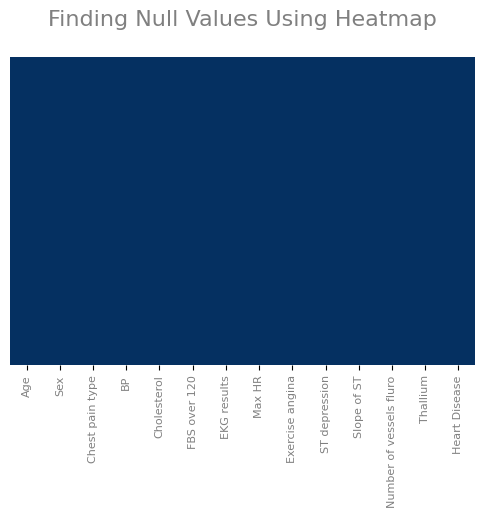

In [4]:
# Another quick way to screening null value: visualizing Null values if it exists
plt.figure(figsize=(6,4))
plt.xticks(size=8,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=16)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='RdBu_r')
plt.show()

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<Figure size 800x600 with 0 Axes>

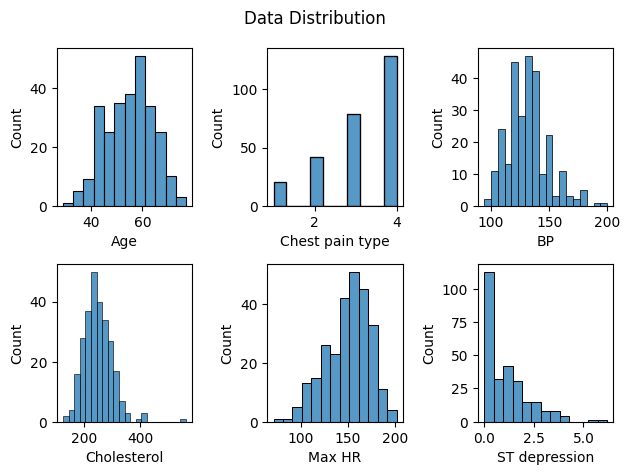

In [6]:
# Visualize data distribution
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(2,3)

sns.histplot(data=df, x="Age",ax=ax[0, 0])
sns.histplot(data=df, x="Chest pain type", ax=ax[0, 1], legend = False)
sns.histplot(data=df, x="BP",ax=ax[0, 2])
sns.histplot(data=df, x="Cholesterol",ax=ax[1, 0])
sns.histplot(data=df, x="Max HR",ax=ax[1, 1])
sns.histplot(data=df, x="ST depression",ax=ax[1, 2])

plt.suptitle("Data Distribution")
plt.tight_layout()

Text(0, 0.5, 'Cholesterol Level')

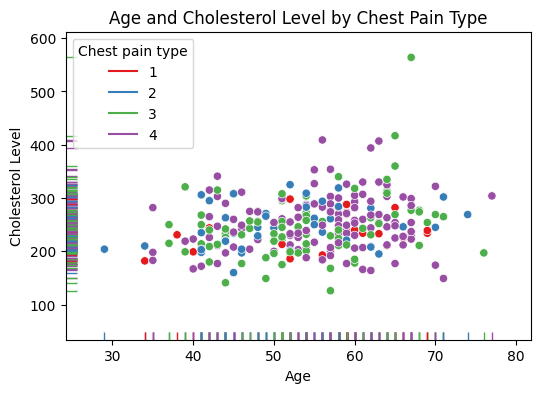

In [7]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x = "Age", y="Cholesterol", hue="Chest pain type", palette = "Set1")
sns.rugplot(data=df, x = "Age", y="Cholesterol", hue="Chest pain type", palette = "Set1")
plt.title("Age and Cholesterol Level by Chest Pain Type")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")


Text(0, 0.5, 'Cholesterol Level')

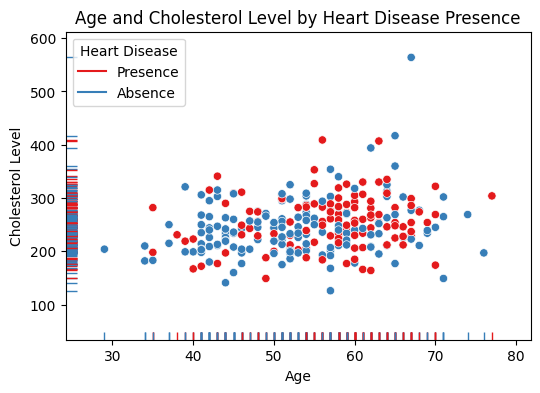

In [8]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x = "Age", y="Cholesterol", hue="Heart Disease", palette = "Set1")
sns.rugplot(data=df, x = "Age", y="Cholesterol", hue="Heart Disease", palette = "Set1")
plt.title("Age and Cholesterol Level by Heart Disease Presence")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")


Text(0.5, 14.722222222222216, 'Cholesterol Level')

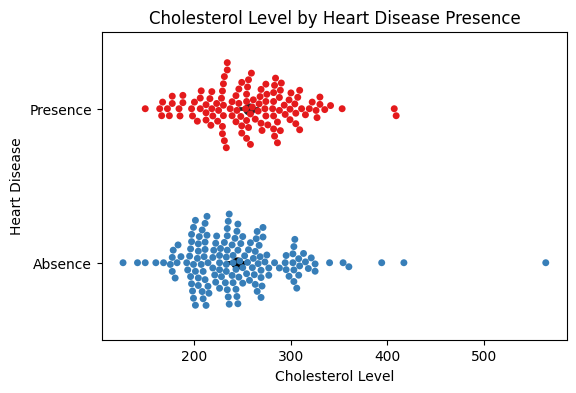

In [9]:
plt.figure(figsize=(6, 4))
sns.swarmplot(data=df, x="Cholesterol", y="Heart Disease", hue="Heart Disease", palette="Set1")
sns.pointplot(data=df, x="Cholesterol", y="Heart Disease", hue="Heart Disease", palette='dark:black', errorbar=('ci', 95))
plt.title("Cholesterol Level by Heart Disease Presence")
plt.xlabel("Cholesterol Level")

Text(0, 0.5, 'Cholesterol Level')

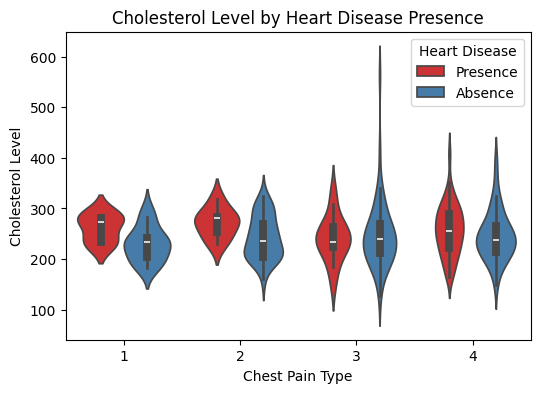

In [10]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="Chest pain type", y="Cholesterol", hue="Heart Disease", palette="Set1")
plt.title("Cholesterol Level by Heart Disease Presence")
plt.xlabel("Chest Pain Type")
plt.ylabel("Cholesterol Level")

#### Here, we examine the Cholesterol Level by the Heart disease and the Chest pain type reported.
#### We can observe that the patients do have a higher level of Cholesterol than the individual without heart disease.
#### The difference is more significant in Type 1 and Type 2 chest pain. 
#### Interestingly, the type 3 chest pain samples includes the sample of the highest and the lowest Cholesterol level. Also, these samples are also from heart disease absence group. This might imply that this symptom may be not heart-associated issue. 
#### This is categorical entry, but the original data set did not label the categories, so we cannot associate symptom with the heart disease here.

In [11]:
df_op = df.copy()
df_chest_overview = df_op.groupby(["Heart Disease","Sex","Chest pain type"])
df_chest_overview.first()

Age   BP  Cholesterol  FBS over 120  \
Heart Disease Sex Chest pain type                                        
Absence       0   1                 60  150          240             0   
                  2                 74  120          269             0   
                  3                 67  115          564             0   
                  4                 57  128          303             0   
              1   1                 64  110          211             0   
                  2                 48  130          245             0   
                  3                 44  140          235             0   
                  4                 64  128          263             0   
Presence      0   2                 58  136          319             1   
                  3                 62  130          263             0   
                  4                 63  150          407             0   
              1   1                 61  134          234             0   
                  2                 57  124          261             0   
                  3                 56  130          256             1   
                  4                 70  130          322             0   

                                   EKG results  Max HR  Exercise angina  \
Heart Disease Sex Chest pain type                                         
Absence       0   1                          0     171                0   
                  2                          2     121                1   
                  3                          2     160                0   
                  4                          2     159                0   
              1   1                          2     144                1   
                  2                          2     180                0   
                  3                          2     180                0   
                  4                          0     105                1   
Presence      0   2                          2     152                0   
                  3                          0      97                0   
                  4                          2     154                0   
              1   1                          0     145                0   
                  2                          0     141                0   
                  3                          2     142                1   
                  4                          2     109                0   

                                   ST depression  Slope of ST  \
Heart Disease Sex Chest pain type                               
Absence       0   1                          0.9            1   
                  2                          0.2            1   
                  3                          1.6            2   
                  4                          0.0            1   
              1   1                          1.8            2   
                  2                          0.2            2   
                  3                          0.0            1   
                  4                          0.2            2   
Presence      0   2                          0.0            1   
                  3                          1.2            2   
                  4                          4.0            2   
              1   1                          2.6            2   
                  2                          0.3            1   
                  3                          0.6            2   
                  4                          2.4            2   

                                   Number of vessels fluro  Thallium  
Heart Disease Sex Chest pain type                                     
Absence       0   1                                      0         3  
                  2                                      1         3  
                  3                                      0         7  
                  4                    

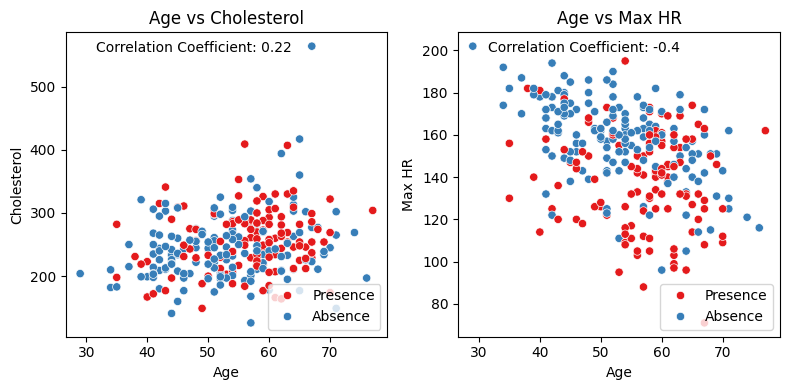

In [12]:
fig, axs =plt.subplots(1, 2, figsize=(8, 4))
factors = ["Cholesterol", "Max HR"]
for i, ax in enumerate(axs.flat):
    sns.scatterplot(data=df_op, x="Age", y=factors[i], ax=ax, hue="Heart Disease", palette="Set1")
    age_corr = round(df_op['Age'].corr(df_op[factors[i]]), 2)
    ax.annotate(f'Correlation Coefficient: {age_corr}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                xytext=(10, 5),
                textcoords='offset points',
                fontsize=10,
                verticalalignment='top', horizontalalignment='left')
    ax.legend(loc='lower right')
    ax.set_title(f'Age vs {factors[i]}')
plt.tight_layout()
plt.show()

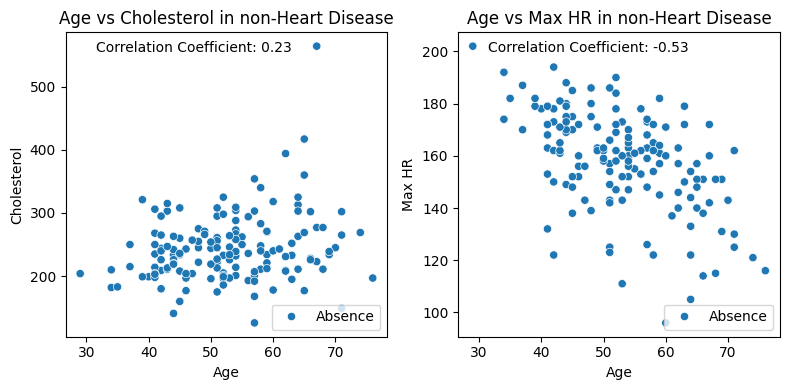

In [13]:
fig, axs =plt.subplots(1, 2, figsize=(8, 4))
factors = ["Cholesterol", "Max HR"]
df_nonheart = df_op[df_op["Heart Disease"] == "Absence"]
for i, ax in enumerate(axs.flat):
    sns.scatterplot(data=df_nonheart , x="Age", y=factors[i], ax=ax, hue="Heart Disease")
    age_corr = round(df_nonheart['Age'].corr(df_nonheart[factors[i]]), 2)
    ax.annotate(f'Correlation Coefficient: {age_corr}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                xytext=(10, 5),
                textcoords='offset points',
                fontsize=10,
                verticalalignment='top', horizontalalignment='left')
    ax.legend(loc='lower right')
    ax.set_title(f'Age vs {factors[i]} in non-Heart Disease')
plt.tight_layout()
plt.show()

#### According to the American Heart Association, the average maximum heart rate is about 220 minus age. Our results shows that the age is moderate negative correlate with Maximum heat rate. The total cholesterol levels also tend to rise with age and we do observe a low correlation in the non-heart diseased group. These results suggest that these samples are aligned with general scientific observations, so these are not biased samples.

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training Set')

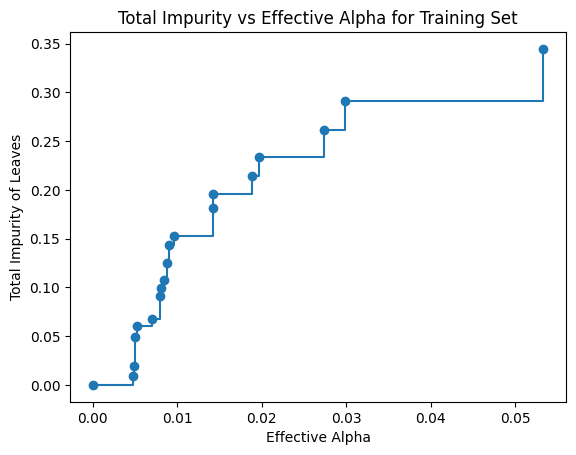

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df_train_x = df_op.copy().drop(columns = ["Heart Disease"])
df_train_y = df_op.loc[:,"Heart Disease"].str.replace("Presence", "1").replace("Absence","0").astype(int)
x = df_train_x.values
y = df_train_y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,shuffle=True, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")


In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1522813036991743


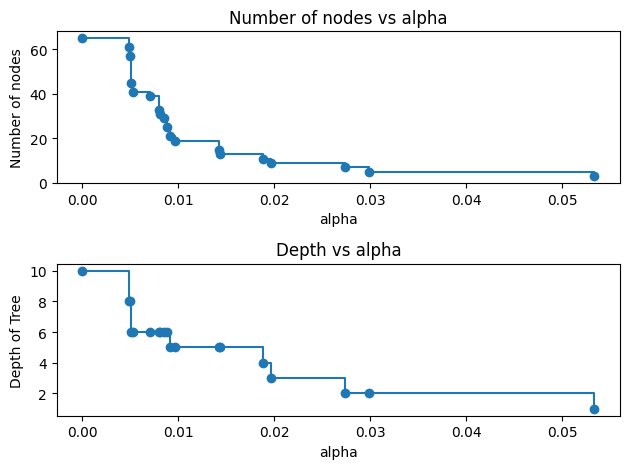

In [16]:
# Visualize the nodes number and the depth
clfs = clfs[:-1] # Remove the last since it's only one node
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

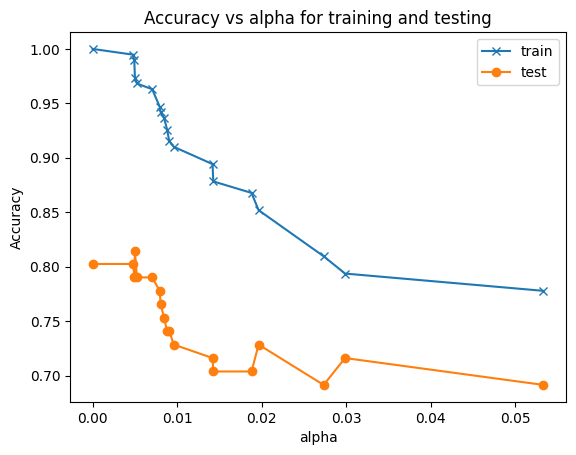

In [17]:
# Visualize the test-score and train-score
train_score = [clf.score(x_train, y_train) for clf in clfs]
test_score = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing")
ax.plot(ccp_alphas,train_score, marker ="x",label = "train")
ax.plot(ccp_alphas,test_score, marker ="o",label = "test")
ax.legend()
plt.show()

In [33]:
for value_test, value_alpha in zip(test_score, ccp_alphas):
    print(f"test-score: {value_test:.3}, alpha: {value_alpha:.3}")

test-score: 0.802, alpha: 0.0
test-score: 0.802, alpha: 0.00481
test-score: 0.79, alpha: 0.00494
test-score: 0.815, alpha: 0.00501
test-score: 0.79, alpha: 0.00524
test-score: 0.79, alpha: 0.00705
test-score: 0.778, alpha: 0.00794
test-score: 0.765, alpha: 0.00806
test-score: 0.753, alpha: 0.00847
test-score: 0.741, alpha: 0.00882
test-score: 0.741, alpha: 0.00907
test-score: 0.728, alpha: 0.00962
test-score: 0.716, alpha: 0.0142
test-score: 0.704, alpha: 0.0143
test-score: 0.704, alpha: 0.0188
test-score: 0.728, alpha: 0.0197
test-score: 0.691, alpha: 0.0273
test-score: 0.716, alpha: 0.0299
test-score: 0.691, alpha: 0.0534


#### Highest test-score is the 0.815, will start with this one

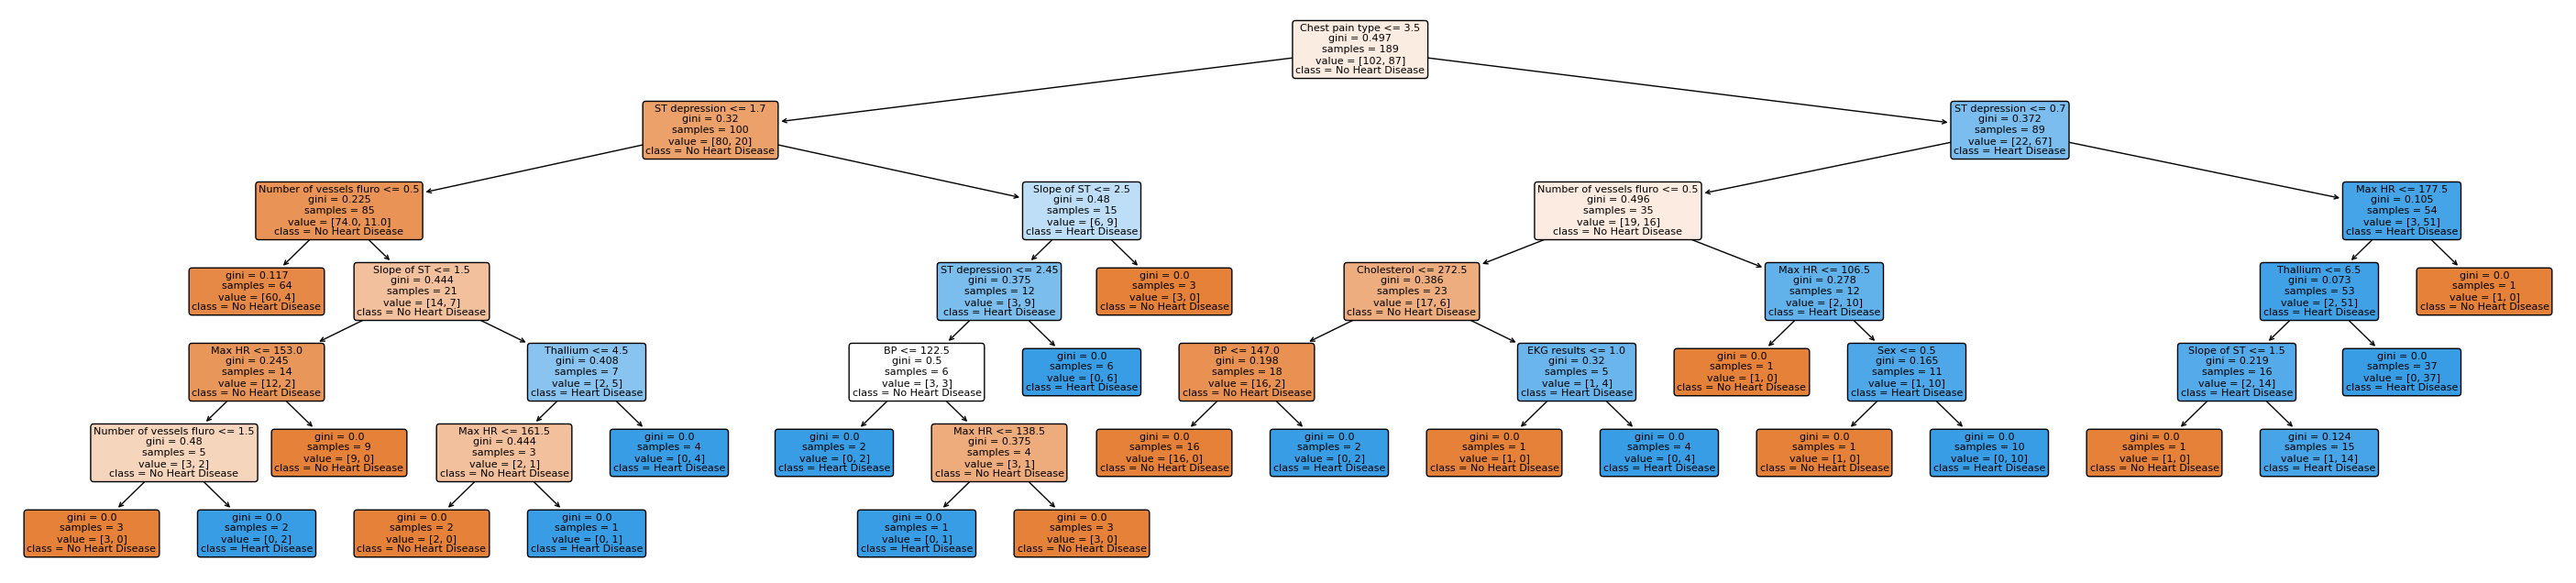

In [20]:
from sklearn import tree
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (36,8), dpi=100)
tree.plot_tree(clfs[3], rounded = True,
feature_names= df_train_x.columns,
filled=True, fontsize=8, class_names=["No Heart Disease", "Heart Disease"])
plt.show()

<Figure size 400x300 with 0 Axes>

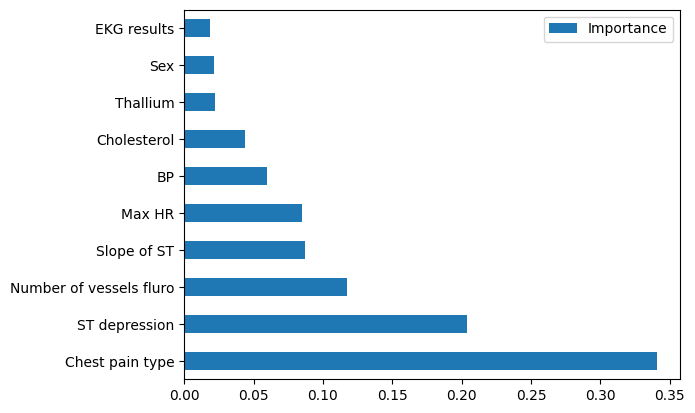

In [21]:
# Visualize the feature importance
plt.figure(figsize=(4, 3))
feature_importances = pd.DataFrame(clfs[3].feature_importances_, index=df_train_x.columns, columns=["Importance"])
feature_importances = feature_importances[feature_importances['Importance'] != 0]
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind = 'barh')
plt.show()

#### Among all factors, the Chest Pain Type and ST depression are more important. Interestingly, the cholesterol is not as important as we thought.

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(f"Accuracy: {accuracy:.3}")

Accuracy: 0.827


In [23]:
from sklearn.metrics import classification_report
y_hat = logistic_regression.predict(x_test)
print(classification_report(y_test, y_hat, target_names = ['without Heart Disease', 'with Heart Disease']))

                       precision    recall  f1-score   support

without Heart Disease       0.87      0.83      0.85        48
   with Heart Disease       0.77      0.82      0.79        33

             accuracy                           0.83        81
            macro avg       0.82      0.83      0.82        81
         weighted avg       0.83      0.83      0.83        81



#### Here, we have a 0.83 accuracy, and with higher precision with normal(non-heart disease population)

Text(0.5, 3.722222222222216, 'Prediction label')

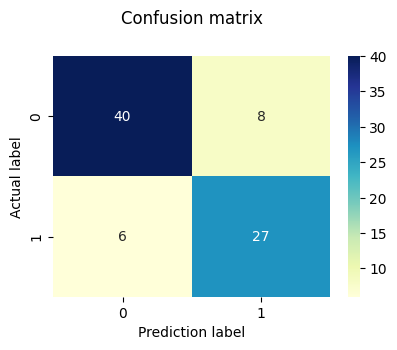

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_hat)
class_names=["without Heart Disease", "Heart Disease"]
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [25]:
# Correct tree plot
# Cross-validation